In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
from matplotlib import  colors
from evaluations.scatter import fancy_scatter_plot

analysis_type='scatter'
analysis_folder = f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/{analysis_type}'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).dropna(dim='test_bins', how='all')
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds,  NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds,NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

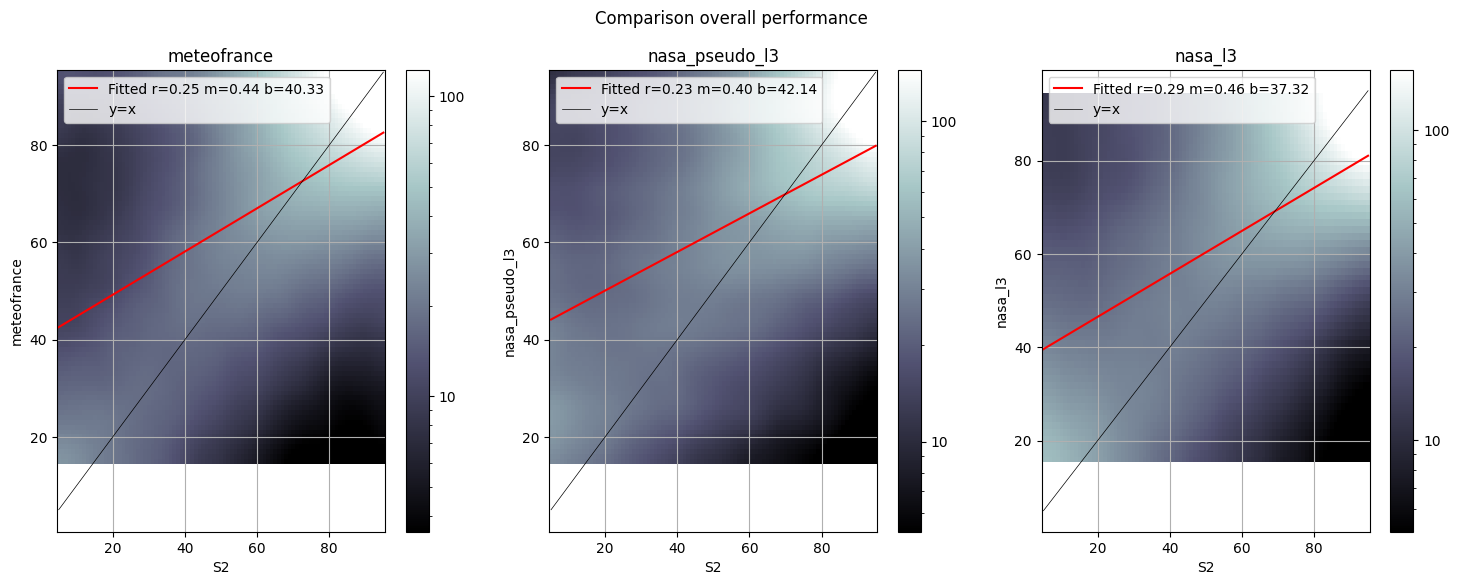

In [8]:
fig, ax = plt.subplots(1,len(analyses_dict), figsize=(6*len(analyses_dict), 6))
fig.suptitle('Comparison overall performance')



for i, (k,v) in enumerate(analyses_dict.items()):
    reduced_v = v.sel(ref_bins=slice(5,95),forest_mask=[0],test_bins=slice(15,95)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i],figure=fig,gaussian_window_size=3)
    ax[i].set_title(k)
    ax[i].set_xlabel("S2")
    ax[i].set_ylabel(k)
    


Text(0, 0.5, 'Météo-France')

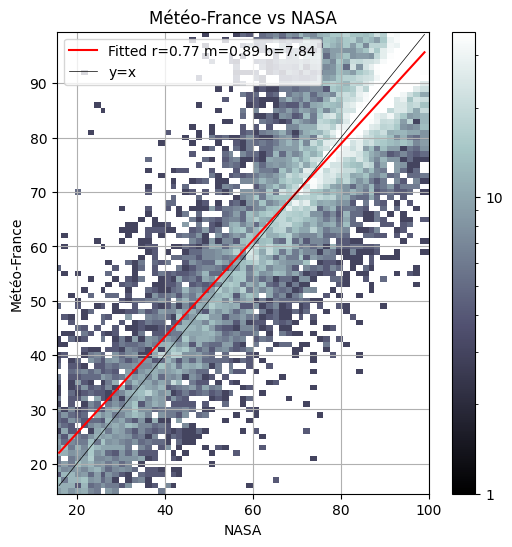

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

nasa_vs_mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/{analysis_type}_WY_2023_2024_SNPP_meteofrance_vs_nasa_l3_res_375m.nc", decode_cf=True).dropna(dim='ref_bins', how='all')
reduced_v = nasa_vs_mf_metrics_ds.sel(ref_bins=slice(15,99),forest_mask=[0], sub_roi=[2], aspect_bins=['NW','N','NE'],time='2024-02',test_bins=slice(15,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
reduced_v = reduced_v.where(reduced_v>2,0)
scatter_plot = fancy_scatter_plot(data_to_plt=reduced_v, ax=ax,figure=fig,gaussian_window_size=None)
ax.set_title("Météo-France vs NASA")
ax.set_xlabel("NASA")
ax.set_ylabel("Météo-France")

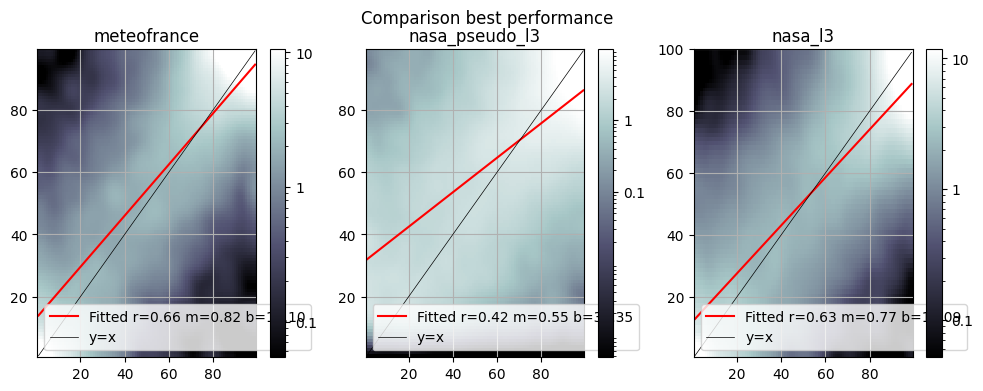

In [28]:
fig, ax = plt.subplots(1,len(analyses_dict), figsize=(12,4))
fig.suptitle('Comparison best performance')
for i, (k,v) in enumerate(analyses_dict.items()):
    reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0], sub_roi=[2], aspect_bins=['SW','S','SE'],time='2024-02',test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    # reduced_v = reduced_v.where(reduced_v > 2,0)
    fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig,gaussian_window_size=3)
    ax[i].set_title(k)

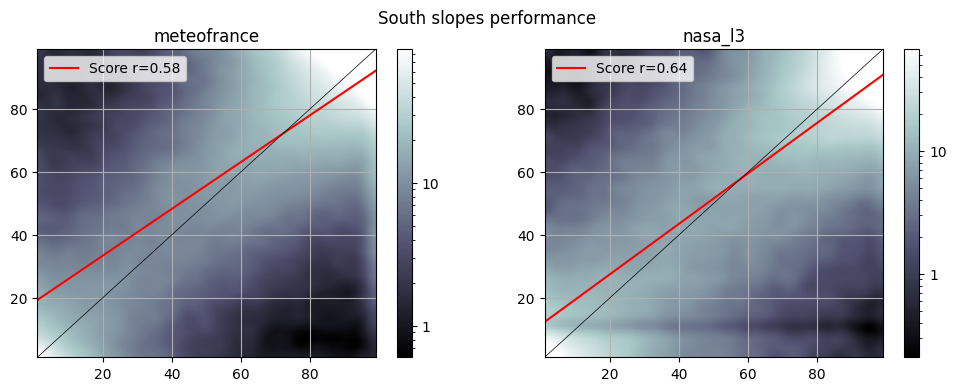

In [4]:
fig, ax = plt.subplots(1,len(analyses_dict), figsize=(12,4))
fig.suptitle('South slopes performance')
for i, (k,v) in enumerate(analyses_dict.items()):
    reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],aspect_bins=['SE','S','SW'],test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
    ax[i].set_title(k)

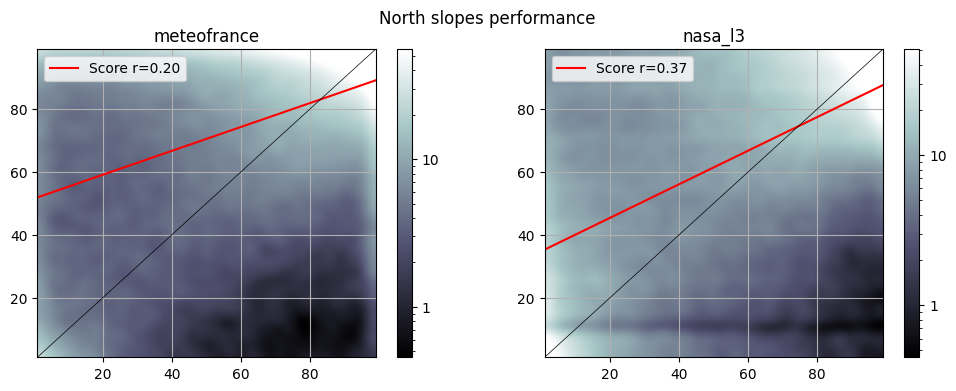

In [5]:
fig, ax = plt.subplots(1,len(analyses_dict), figsize=(12,4))
fig.suptitle('North slopes performance')
for i, (k,v) in enumerate(analyses_dict.items()):
    reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],aspect_bins=['NE','N','NW'],test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
    fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
    ax[i].set_title(k)

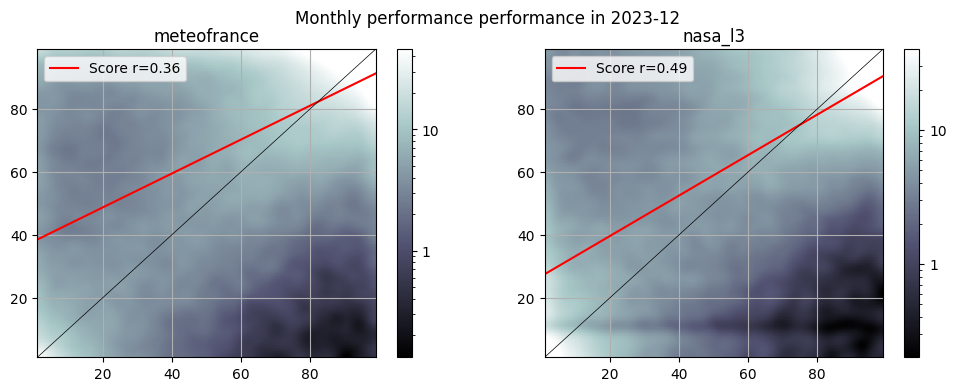

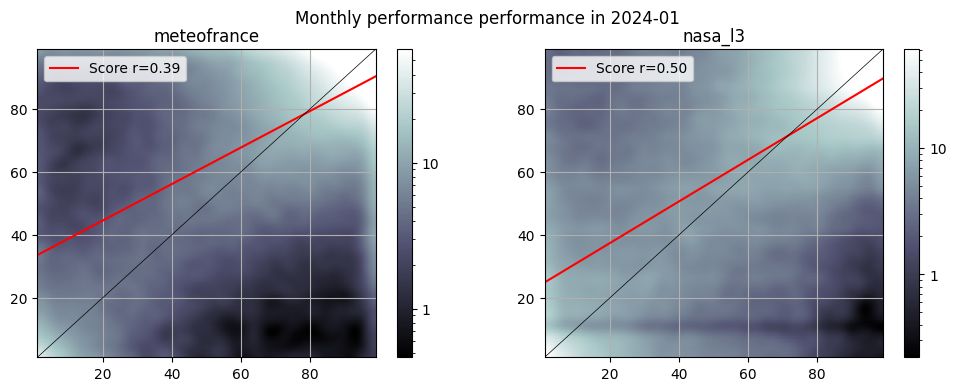

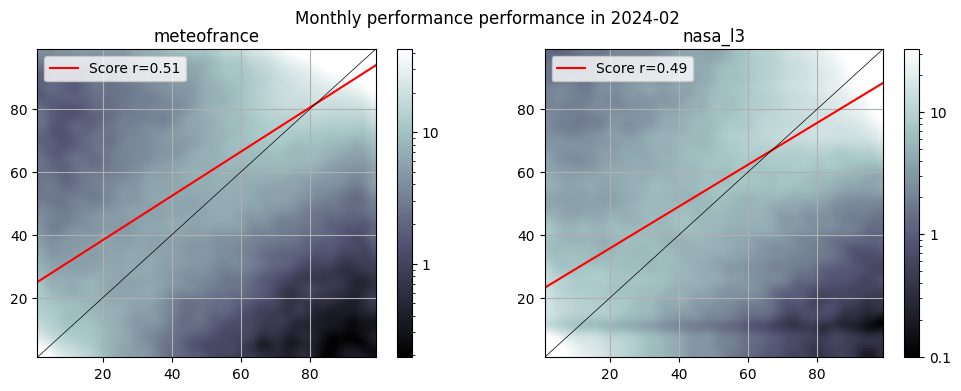

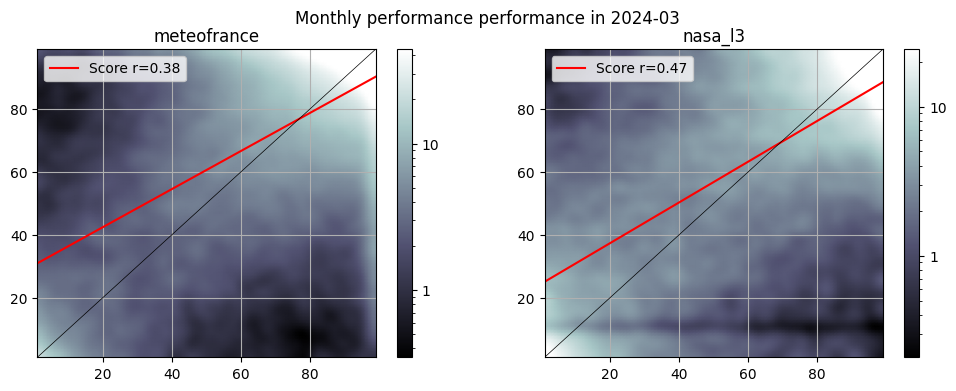

In [6]:
for t in ['2023-12', '2024-01', '2024-02', '2024-03']:
    fig, ax = plt.subplots(1,len(analyses_dict), figsize=(12,4))
    fig.suptitle(f'Monthly performance performance in {t}')
    for i, (k,v) in enumerate(analyses_dict.items()):
        reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],time=t,test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
        fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
        ax[i].set_title(k)

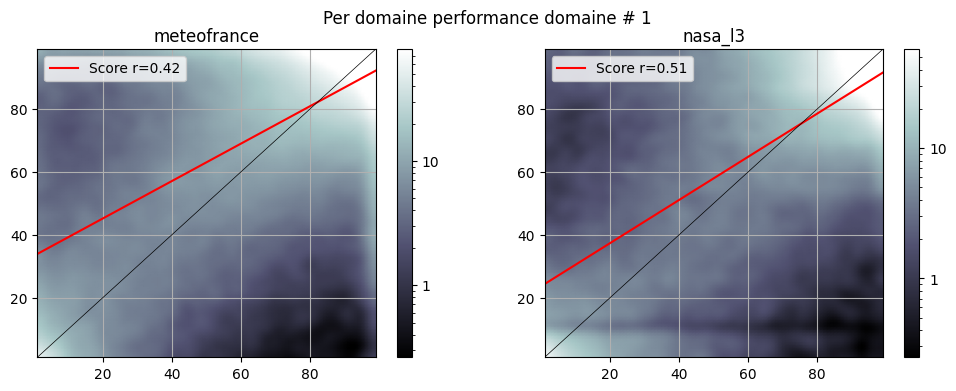

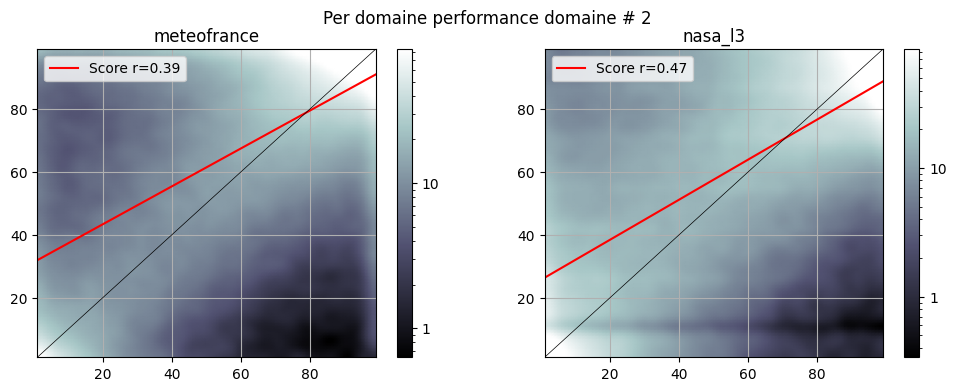

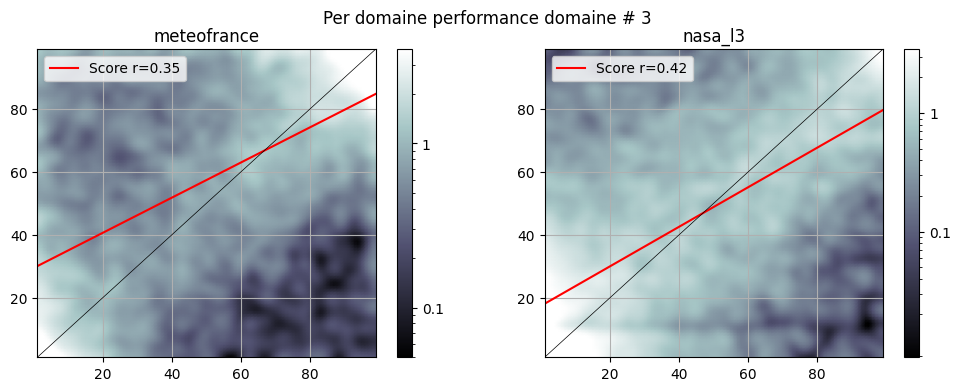

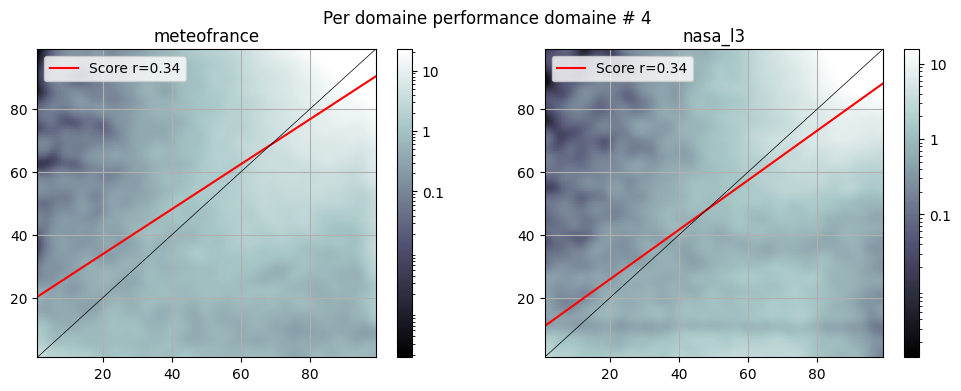

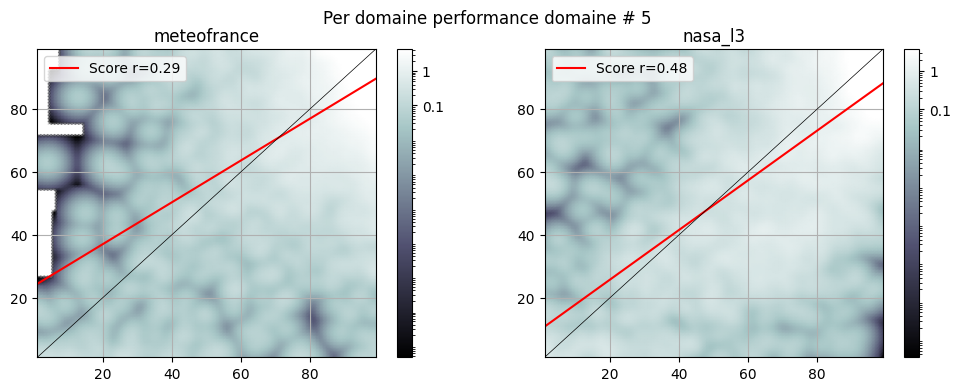

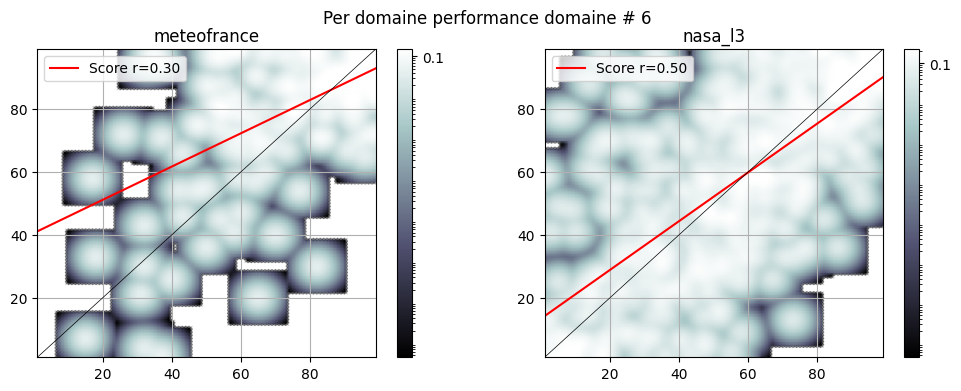

In [7]:
for d in [1,2,3,4,5,6]:
    fig, ax = plt.subplots(1,len(analyses_dict), figsize=(12,4))
    fig.suptitle(f'Per domaine performance domaine # {d}')
    for i, (k,v) in enumerate(analyses_dict.items()):
        reduced_v = v.sel(ref_bins=slice(1,99),forest_mask=[0],sub_roi=[d],test_bins=slice(1,99)).sum(dim=('forest_mask','sub_roi','time','aspect_bins')).data_vars['n_occurrences']
        fancy_scatter_plot(data_to_plt=reduced_v, ax=ax[i], figure=fig)
        ax[i].set_title(k)

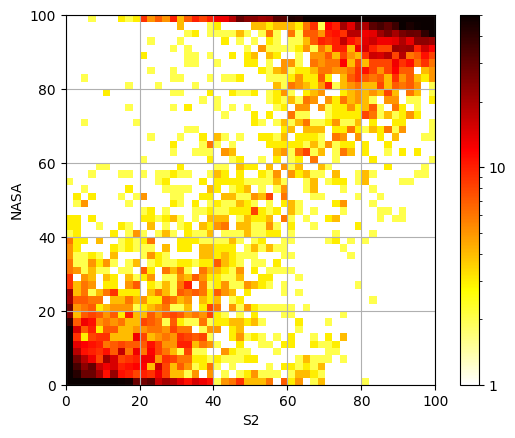

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm


nasa = nasa_time_series.data_vars['snow_cover'].sel(time=common_days)
s2 = s2_time_series.data_vars['snow_cover'].sel(time=common_days)
nasa = nasa.where(mf_forest_with_snow_mask)
nasa_mask = nasa<=100
s2_mask = s2<=100
union_mask = nasa_mask & s2_mask
nasa = nasa.where(union_mask)
s2 = s2.where(union_mask)

nasa = nasa.astype(np.float32).coarsen(y=4,x=4, boundary='trim').mean(skipna=False)
s2 = s2.astype(np.float32).coarsen(y=4,x=4, boundary='trim').mean(skipna=False)

fig, ax = plt.subplots()



img, extent = myplot(s2, nasa, 0, bins=50)
pos = ax.imshow(img, extent=list(extent), origin='lower',cmap=colorsmap,norm=colors.LogNorm(vmin=1, vmax=50))
fig.colorbar(pos, ax=ax, format=formatter)
ax.set_xlabel('S2')
ax.set_ylabel('NASA')
ax.grid(True)

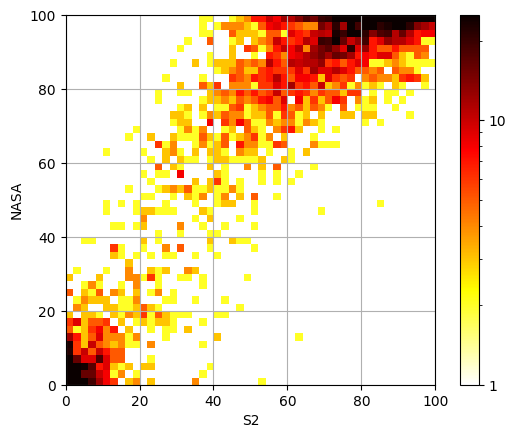

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm


nasa = nasa_time_series.data_vars['snow_cover'].sel(time=common_days)
s2 = s2_time_series.data_vars['snow_cover'].sel(time=common_days)
nasa_mask = nasa<=100
s2_mask = s2<=100
union_mask = nasa_mask & s2_mask
nasa = nasa.where(union_mask)
s2 = s2.where(union_mask)

nasa = nasa.astype(np.float32).coarsen(y=8,x=8, boundary='trim').mean(skipna=False)
s2 = s2.astype(np.float32).coarsen(y=8,x=8, boundary='trim').mean(skipna=False)

fig, ax = plt.subplots()



img, extent = myplot(s2, nasa, 0, bins=50)
pos = ax.imshow(img, extent=list(extent), origin='lower',cmap=colorsmap,norm=colors.LogNorm(vmin=1, vmax=25))
fig.colorbar(pos, ax=ax, format=formatter)
ax.set_xlabel('S2')
ax.set_ylabel('NASA')
ax.grid(True)

In [84]:
s2f = glob.glob('/home/imperatoren/work/VIIRS_S2_comparison/poc_resampling/FSC_20240130T105908_S2A_T31TCH_V102_1_FSCOG/*tif')[0]
s2_data = rio.open(s2f).read(1, masked=True)
#day = np.datetime64(datetime.datetime(year=2017, month=1, day=3))

vf = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/snow_cover_extent_analysis/WY_2023_2024_SuomiNPP_nasa_time_series.nc'
viirs = xr.open_dataset(vf).sel(time='2024-01-03')

In [85]:
A = viirs.data_vars['snow_cover']
viirs_masked = np.ma.masked_array(A, mask=A>=250)

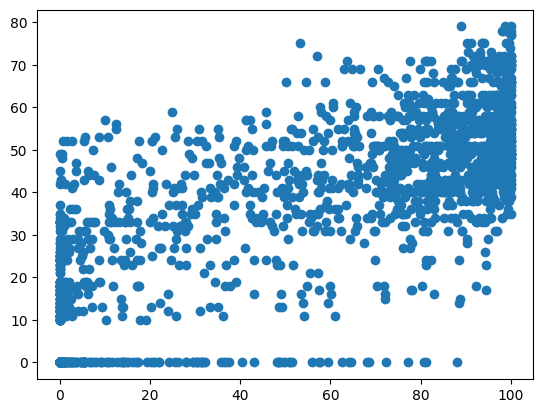

In [86]:
import matplotlib.pyplot as plt

plt.scatter(s2_data, viirs_masked)

In [3]:
from typing import List
import rasterio as rio
import glob as glob
import xarray as xr
import datetime as datetime
import numpy as np
import xarray as xr
from pathlib import Path
from winter_year import WinterYear
import pandas as pd
import matplotlib.pyplot as plt
winter_year = WinterYear(2023, 2024)
resolution=1000
time_series_folder = '../output_folder/version_3'
s2_filename = f'WY_2023_2024_S2_res_{resolution}m.nc'
mf_filename = f'WY_2023_2024_SNPP_meteofrance_res_{resolution}m.nc'
nasa_filename = f'WY_2023_2024_SNPP_nasa_l3_res_{resolution}m.nc'
nasa_pseudo_l3_filename = f'WY_2023_2024_SNPP_nasa_pseudo_l3_res_{resolution}m.nc'
s2_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(s2_filename))
meteofrance_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(mf_filename))
nasa_l3_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(nasa_filename))
nasa_pseudo_l3_time_series = xr.open_dataset(Path(f"{time_series_folder}").joinpath(nasa_pseudo_l3_filename))

def find_common_days(time_series_list: List[xr.Dataset]):
    common_days_old = time_series_list[0]["time"]
    for i in range(1,len(time_series_list)):
        common_days_new= np.intersect1d(common_days_old, time_series_list[i]["time"])
        common_days_old = common_days_new
    return common_days_new

common_days = find_common_days(time_series_list=[s2_time_series, meteofrance_time_series, nasa_pseudo_l3_time_series])
s2_time_series = s2_time_series.sel(time=common_days)
meteofrance_time_series = meteofrance_time_series.sel(time=common_days)
nasa_pseudo_l3_time_series = nasa_pseudo_l3_time_series.sel(time=common_days)
